   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

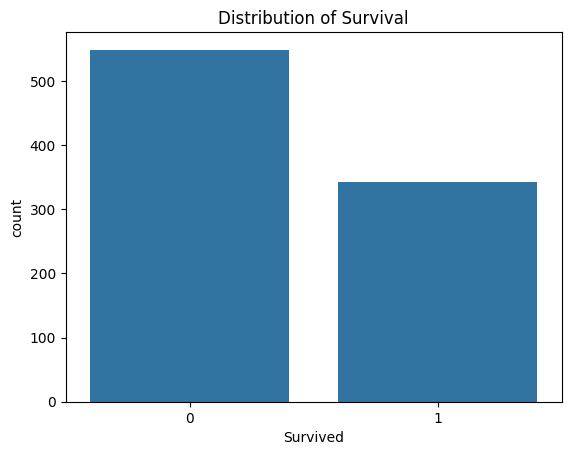

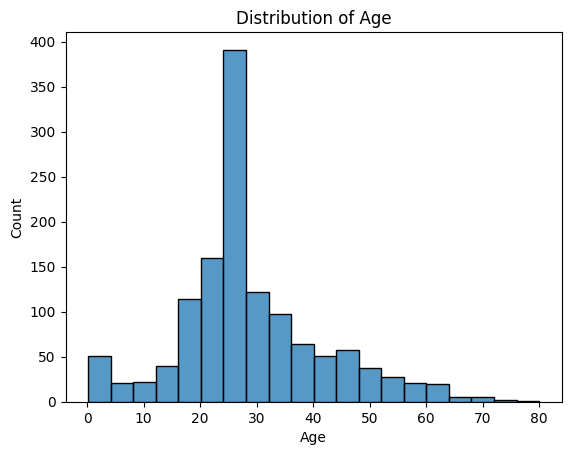

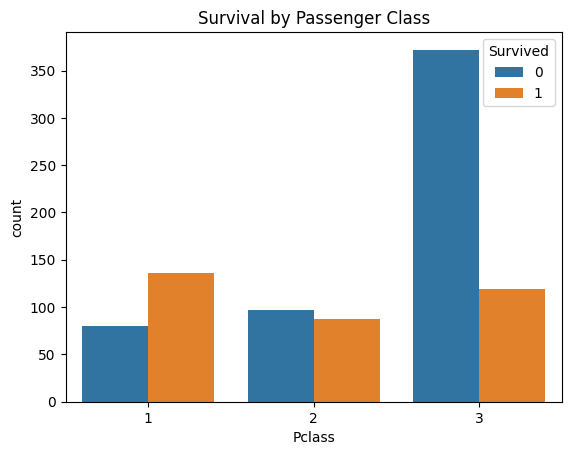

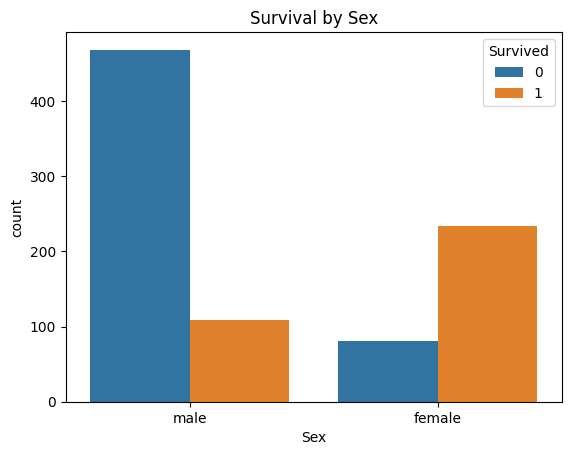

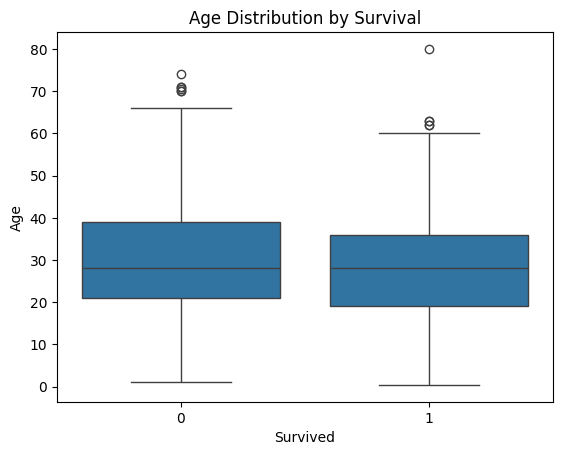

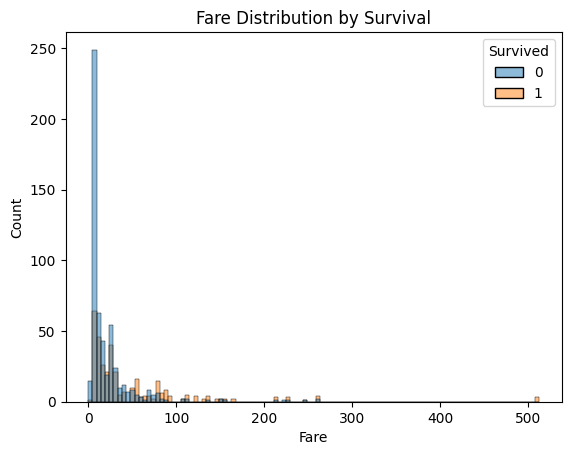

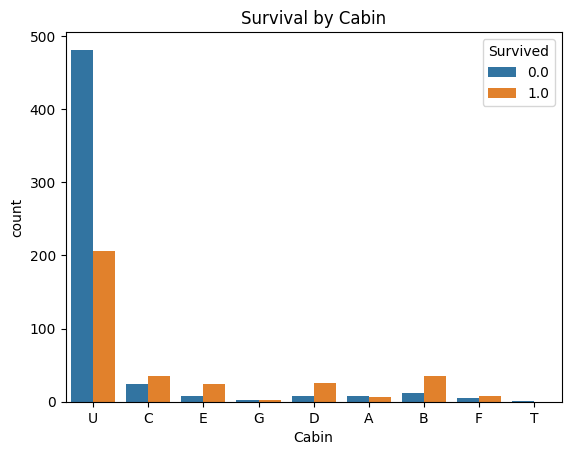

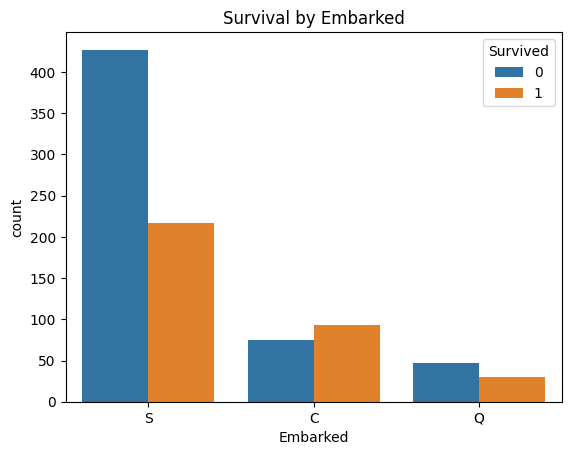

<ipython-input-10-b7886bc9965a>:73: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


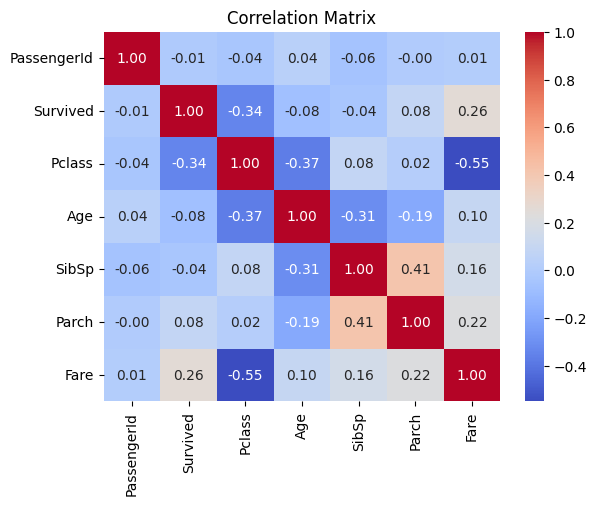

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train and test datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Concatenate train and test datasets for combined analysis
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Display the first few rows of the combined dataset
print(combined_df.head())

# Check for missing values
print(combined_df.isnull().sum())

# Remove unnecessary columns like Name and Ticket
combined_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Handle missing values in Age, Fare, Cabin, and Embarked columns
combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)
combined_df['Cabin'].fillna('Unknown', inplace=True)
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)

# Perform EDA
# Distribution of survival
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival')
plt.show()

# Distribution of Age
sns.histplot(combined_df['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# Relationship between Pclass and Survival
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

# Relationship between Sex and Survival
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Sex')
plt.show()

# Relationship between Age and Survival
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age Distribution by Survival')
plt.show()

# Relationship between Fare and Survival
sns.histplot(x='Fare', hue='Survived', data=train_df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.show()

# Relationship between Cabin and Survival
combined_df['Cabin'] = combined_df['Cabin'].apply(lambda x: x[0])
sns.countplot(x='Cabin', hue='Survived', data=combined_df)
plt.title('Survival by Cabin')
plt.show()

# Relationship between Embarked and Survival
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival by Embarked')
plt.show()

# Correlation matrix
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
